### DATA SCIENCE AND BUSSINESS ANALYTICS INTERNSHIP - THE SPARKS FOUNDATION

#### TASK 6 : PREDICTION USING DECISION TREE ALGORITHM

#### AUTHOR : VIVEK DEDANI

In [15]:
import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

 ##### LOADING THE DATASET 

In [16]:
iris = datasets.load_iris()

In [17]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
# creating the dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
df.info()
print("\nhere in not-NUll count we can see that there are No Null values present in dataset")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB

here in not-NUll count we can see that there are No Null values present in dataset


In [28]:
# targets of our dataset
target=iris.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
df['target']=target  # adding the target column to our dataset

In [32]:
print(df['target'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


#### visually analysing our dataset

Visualizing dataframe -->






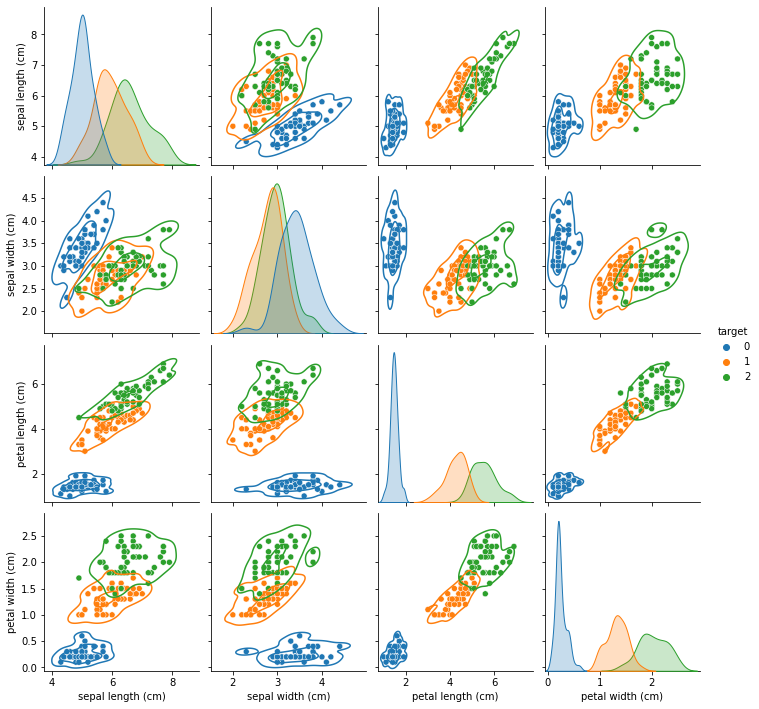

In [35]:

print("Visualizing dataframe -->\n")
plot_var_1 = sns.pairplot(df, kind = 'scatter', diag_kind='kde', hue = 'target', palette=["C0", "C1", "C2"])
plot_var_2 = plot_var_1.map_lower(sns.kdeplot, levels=3)
plot_1 = plot_var_2.map_upper(sns.kdeplot, levels=3)
print(plot_1)
print("\n"*2)

#### getting the dataset ready for train_test_spilt

In [38]:
x=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=df[['target']]
print(x.shape,'\n',y.shape)


(150, 4) 
 (150, 1)


#### spliting dataset into 80:20 ratio for train and test set.

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# training set
print(x_train,'\n')
print(x_train.shape,'\n')
print(y_train,'\n')
print(y_train.shape,'\n')
# testing set
print(x_test,'\n')
print(x_test.shape,'\n')
print(y_test,'\n')
print(y_test.shape,'\n')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
29                 4.7               3.2                1.6               0.2
58                 6.6               2.9                4.6               1.3
32                 5.2               4.1                1.5               0.1
35                 5.0               3.2                1.2               0.2
142                5.8               2.7                5.1               1.9
..                 ...               ...                ...               ...
99                 5.7               2.8                4.1               1.3
65                 6.7               3.1                4.4               1.4
88                 5.6               3.0                4.1               1.3
145                6.7               3.0                5.2               2.3
144                6.7               3.3                5.7               2.5

[120 rows x 4 columns] 

(120, 4) 

     target
29        0
58 

### creating the Decison Tree model


In [47]:
# defining the model parameters
decision_tree=DecisionTreeClassifier(max_depth=10,random_state=2)
# fitting the model on our train data
decision_tree.fit(x_train,y_train)
print("model fitted...")

model fitted...


#### making a prediction on our testdata

In [57]:
y_pred=decision_tree.predict(x_test)
prediction=decision_tree.score(x_test,y_test)
print('here our model predict the correct target with the accuracy of',100*prediction)

here our model predict the correct target with the accuracy of 96.66666666666667


#### analysing the model prediction using confusion matrix

In [50]:
# use the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,decision_tree.predict(x_test))
cm

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  0,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

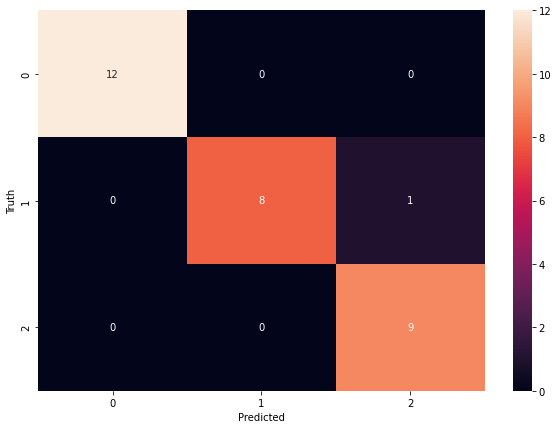

In [52]:
# visualizing the confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Visualing decision tree

In [55]:
## text representation
from sklearn import tree
text_representation = tree.export_text(decision_tree)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



#### ploting the tree using plot_tree

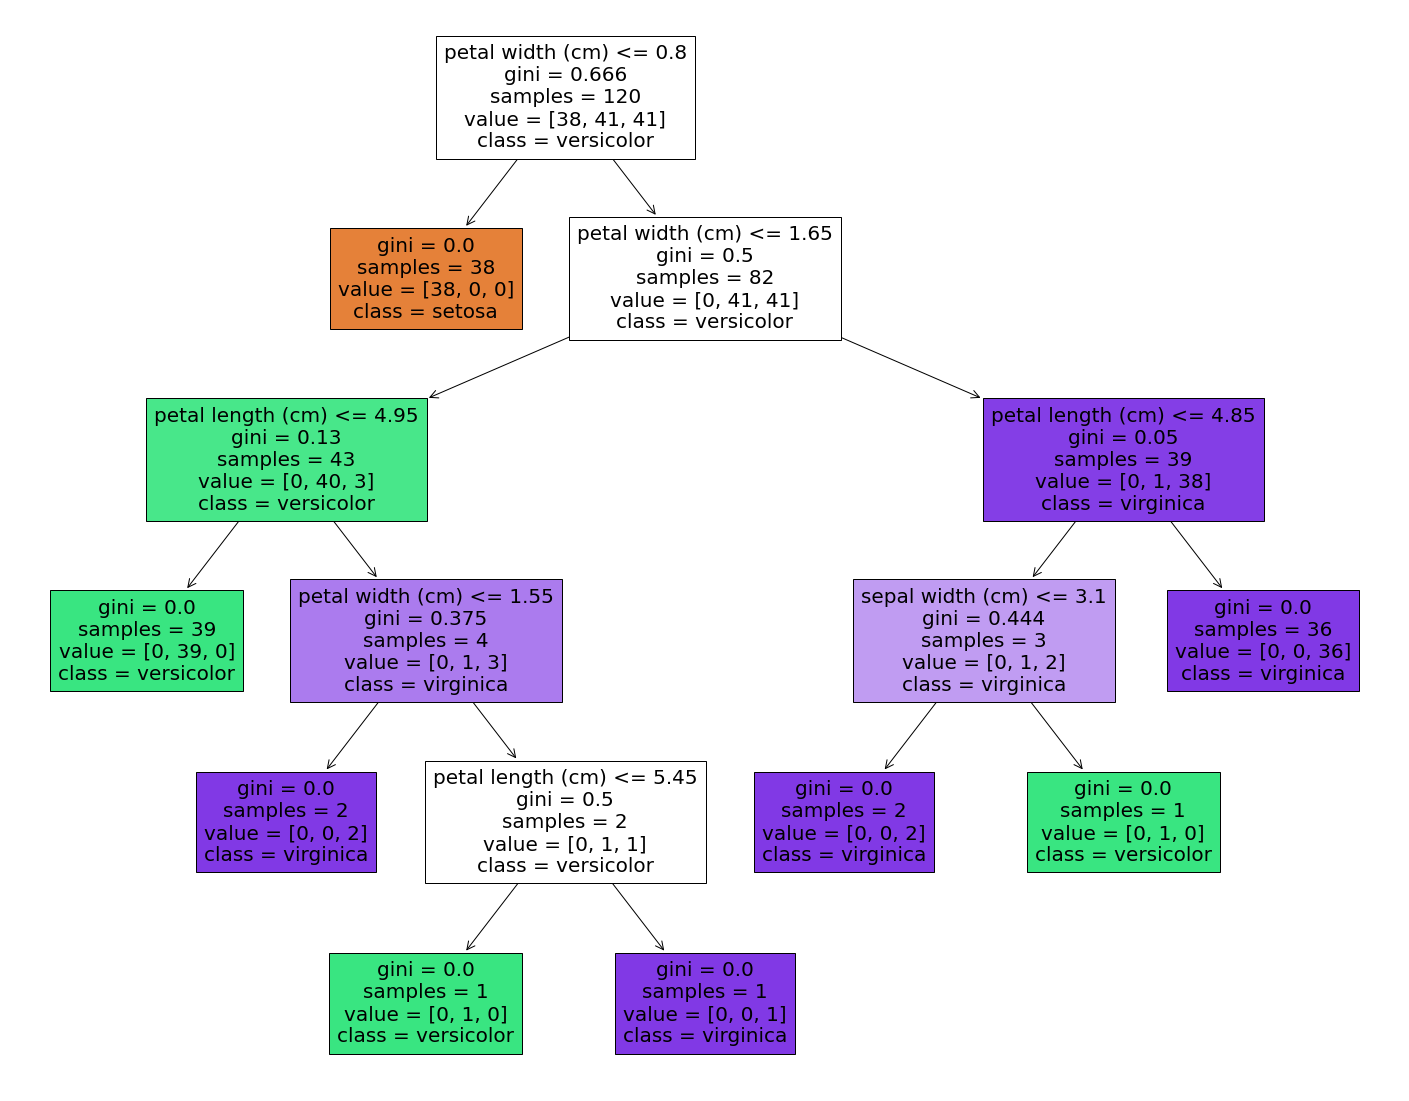

In [56]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

#### Thank you !